# Rho+ Gallery

This page is a tour of what Rho+ has to offer.

Rho+ has two major parts:
 - An aesthetically pleasing theme, with harmonious light and dark variants, that works for `matplotlib`, `bokeh`, `plotly`, and `altair` plots.
 - A bunch of assorted odds and ends for making beautiful plots or exploring data, designed for ease of use for exploratory data analysis inside Jupyter.

Think of Rho+ as a nitro canister for your data visualization inside Python. This page shows all of the new tools you have at your disposal.

In [16]:
# for Google Colab

%pip install rho_plus matplotlib seaborn bokeh panel

Note: you may need to restart the kernel to use updated packages.


## Rho+ "House Style"

A quick demonstration of the Rho+ theming, as seen in Matplotlib. To set it up in your notebook, simply run

```python
import rho_plus as rp

theme, colors = rp.mpl_setup(is_dark=True)
```

Now `theme` is an `rcParams` that's been made the default, and `colors` is a list of 12 colors that form the new default sequence.

First, let's show the default `matplotlib` theme:

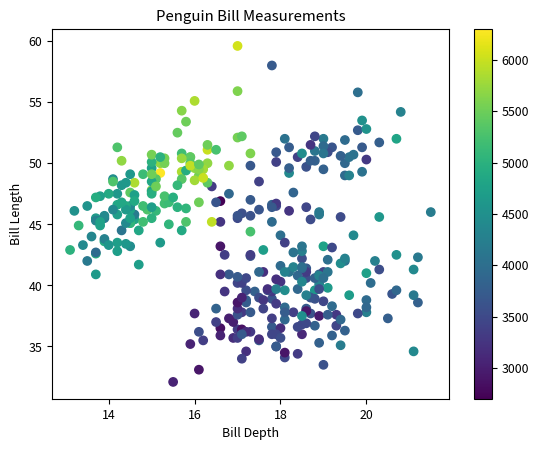

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

pg = sns.load_dataset('penguins')

def pg_plot():
    plt.scatter(data=pg, x='bill_depth_mm', y='bill_length_mm', c='body_mass_g')
    plt.colorbar()
    plt.xlabel('Bill Depth') 
    plt.ylabel('Bill Length') 
    plt.title('Penguin Bill Measurements')    

# first: the default plot
with plt.style.context('default', after_reset=True):
    pg_plot()

Now, the Rho+ version:

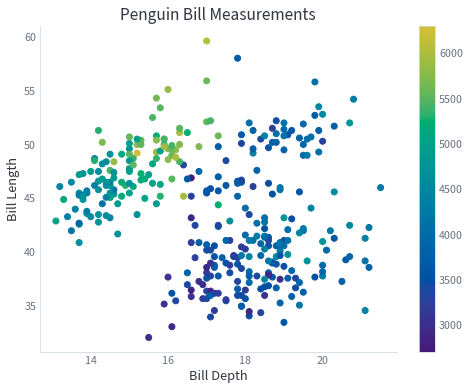

In [2]:
IS_DARK = False
theme, colors = rp.mpl_setup(IS_DARK)

pg_plot()

The highlights to notice:

 - A lot less clutter! 
 - DejaVu Sans is not the default font: instead, Rho+ uses [Source Sans](https://fonts.google.com/specimen/Source+Sans+3).
 - The default colormap has been modified: note how the brightest yellows are a little bit easier to see on white.

The kicker is that, if you like to work in dark mode instead, it's easy to switch:

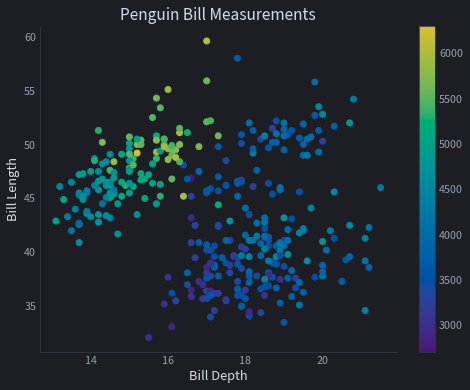

In [3]:
IS_DARK = True
theme, colors = rp.mpl_setup(IS_DARK)

pg_plot()

## Matplotlib/Seaborn Beyond Stylesheets

There's only so much Rho+ can do by modifying the stylesheet used in Matplotlib. For more, Rho+ has several functions that modify existing `matplotlib` plots to give them a glow-up.

### Custom Lineplot Labels

It can be very difficult to keep track of which line is which in a large line plot because, unlike a box plot, there's no obvious place to put a label:

<AxesSubplot:xlabel='year', ylabel='passengers'>

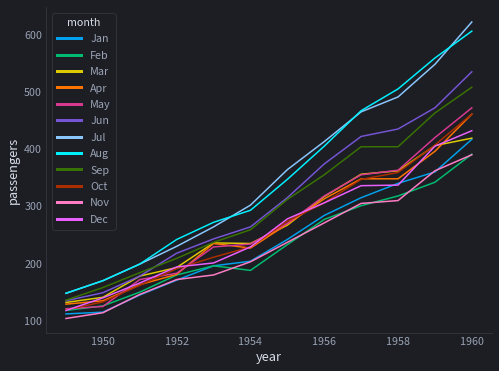

In [4]:
flights = sns.load_dataset('flights')

sns.lineplot(data=flights, x='year', y='passengers', hue='month', lw=1.5)

Good luck trying to figure out which month is which.

With the power of `rp.line_labels()`, the legend is replaced with an annotation beside each line's final value:

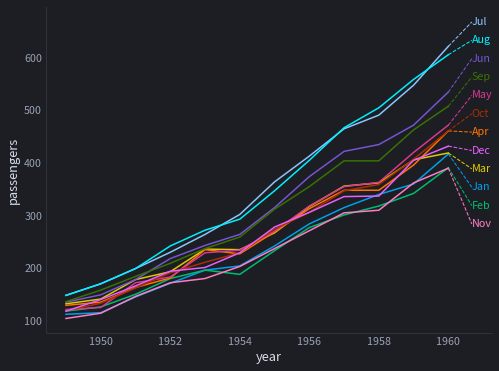

In [5]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', lw=1.5)

rp.line_labels()

Note how the line labels are shifted so they don't overlap. Doing this with minimal shifting is a hard problem that Rho+ handles pretty well. Labels are line-wrapped and given exactly as much room as they need. (If you want to change the font size or style of the labels, change the legend label styling *before* calling `line_labels()` so Rho+ knows how big everything is.)

See what a really big text label looks like:

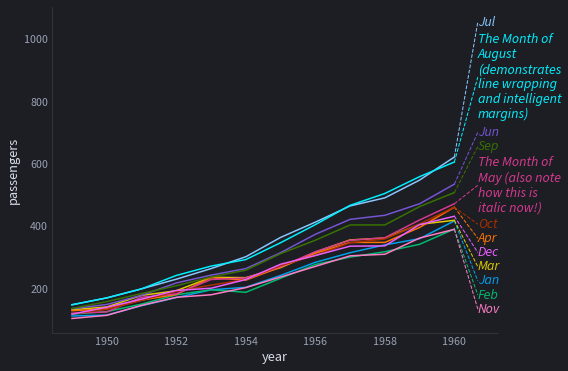

In [6]:
flights2 = flights.copy()
flights2['month'] = flights2['month'].replace(['Aug'], 'The Month of August (demonstrates line wrapping and intelligent margins)')
flights2['month'] = flights2['month'].replace(['May'], 'The Month of May (also note how this is italic now!)')
sns.lineplot(data=flights2, x='year', y='passengers', hue='month', lw=1.5)

rp.line_labels(size=14, style='italic')

### Readable Y-Axis Labels

For space efficiency, most plotting libraries have a default y-axis label that is tilted 90 degrees. If you want your label to be how all other English text is read, you can call `rp.ylabel_top()`. It turns the y-axis label right side up, moves it to the top to save some space by avoiding overlap with the y-axis tick labels, and wraps it if it would be too long.

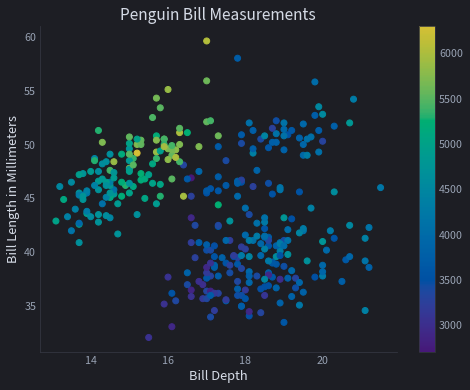

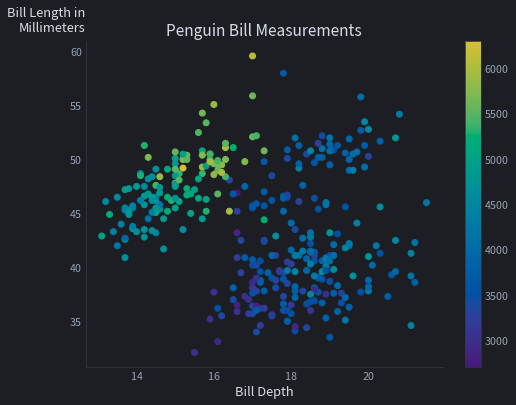

In [7]:
pg_plot()
plt.ylabel('Bill Length in Millimeters')
plt.show()

pg_plot()
plt.ylabel('Bill Length in Millimeters')
rp.ylabel_top()

### Custom Boxplot Styling

This is what a box plot looks like using just the stylesheet. It also demonstrates the default categorical color theme.

<AxesSubplot:xlabel='passengers', ylabel='month'>

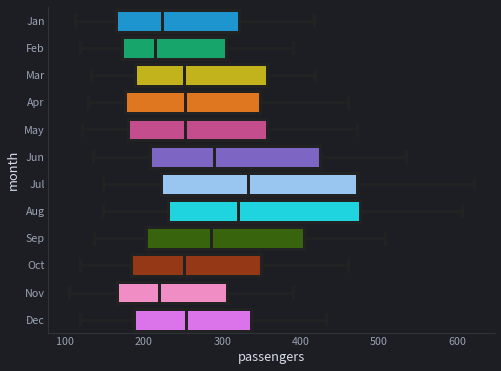

In [8]:
sns.boxplot(data=flights, x='passengers', y='month')

The "whiskers" aren't quite right, and it's a bit loud with the filled colors taking up so much of the figure.

To fix the whisker styling, pass in `**rp.boxstyle()` into `sns.boxplot` or `plt.boxplot`. 

To make the boxplot only colored on the edges, call `rp.unfill_boxplot()` after plotting a boxplot.

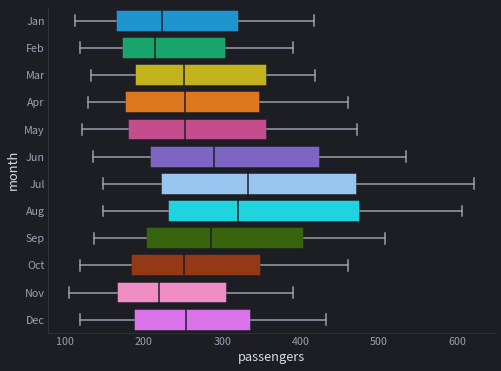

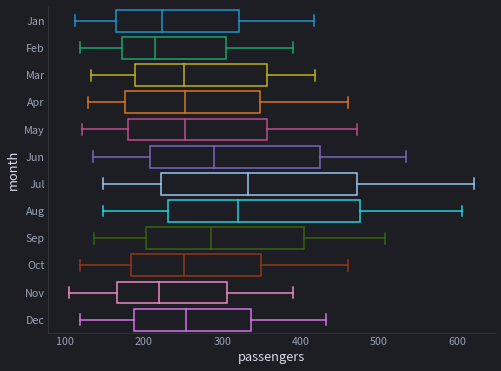

In [9]:
sns.boxplot(data=flights, x='passengers', y='month', **rp.boxstyle())
plt.show()

sns.boxplot(data=flights, x='passengers', y='month', **rp.boxstyle())
rp.unfill_boxplot()

### Smarter Tick Limits

À la Edward Tufte, legend of data visualization, `rp.smart_ticks()` modifies the axis limits to show the maximium and minimum while adding negligible clutter. Pass `xaxis=False` or `yaxis=False` to only change a single axis.

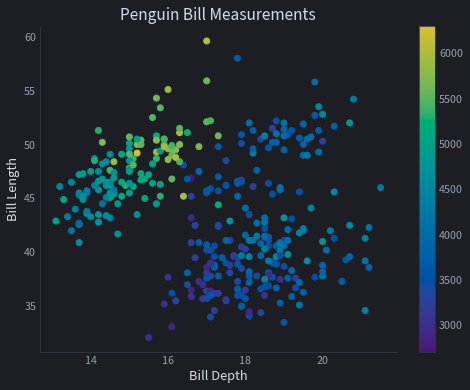

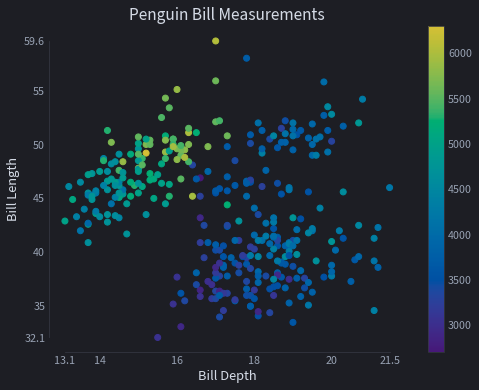

In [10]:
pg_plot()
plt.show()

pg_plot()
rp.smart_ticks()

## Interactive Exploratory Widgets

Rho+ includes some useful features for working with the [`holoviews`](https://holoviews.org/) ecosystem (`panel`, `bokeh`, `holoviews`, and `hvplot`). Like above, you set things up with

```python
import rho_plus as rp

IS_DARK = True
rp.panel_setup(IS_DARK)
```

### Data Grid

Often, when doing data science, you just want to do basic spreadsheet operations on a DataFrame. Unfortunately, the default rendering of `pandas` DataFrames in VSCode or the standard notebook doesn't offer much in the way of functionality. Enter `rp.datagrid()`:

In [11]:
import rho_plus as rp

IS_DARK = True
rp.panel_setup(IS_DARK)

rp.datagrid(pg)

BokehModel(combine_events=True, render_bundle={'docs_json': {'02c6a85e-e6f9-4acd-bb39-7e72a097f354': {'defs': …

Perspective(DataFrame, columns=['index', 'species', ...], sizing_mode='stretch_width', theme='material-dense-dark')

This data grid, courtesy of [Perspective](https://perspective.finos.org/), has a lot of features. Drag any of the columns to the "Group By", "Split By", "Order By", or "Where" fields to start slicing and dicing the data. Hit the icon next to each column to customize that field's display.

Rho+ provides a simple wrapper that uses the current Panel dark mode setting and fills the screen horizontally.

### Object Tree Viewer

Exploring big nested objects inside a notebook can be quite challenging. Enter `rp.show_json()`:

In [15]:
rp.show_json(rp.vega_rho_dark)

BokehModel(combine_events=True, render_bundle={'docs_json': {'4084b6da-1d52-43ab-8bf4-65cd3357178d': {'defs': …

Column(background='#1E1E1E', scroll=True, sizing_mode='stretch_width')
    [0] JSON(str, height=600, hover_preview=True, sizing_mode='stretch_width')

This is a simple way of looking through an object: serializing to JSON and then displaying using a widget like this one. Hovering over an object shows its nested values, and as always it matches your existing dark mode setting.